<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Model training](#model_training)<br>
    7.1. [Decision Tree](#decision_tree)<br>
    7.2. [Random Forest](#random_forest)<br>
    7.3. [Comparing algorithm performances](#comparing_algorithm_performances)
8. [Tuning](#tuning)<br>
9. [Bonus:Classification](#Bonus:Classification)<br>

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

# 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [2]:
taxi_jan_2019 = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')
taxi_data = pd.concat([taxi_jan_2019])
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [3]:
taxi_data.shape

(7696617, 19)

# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [4]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID', 'payment_type','total_amount']]
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

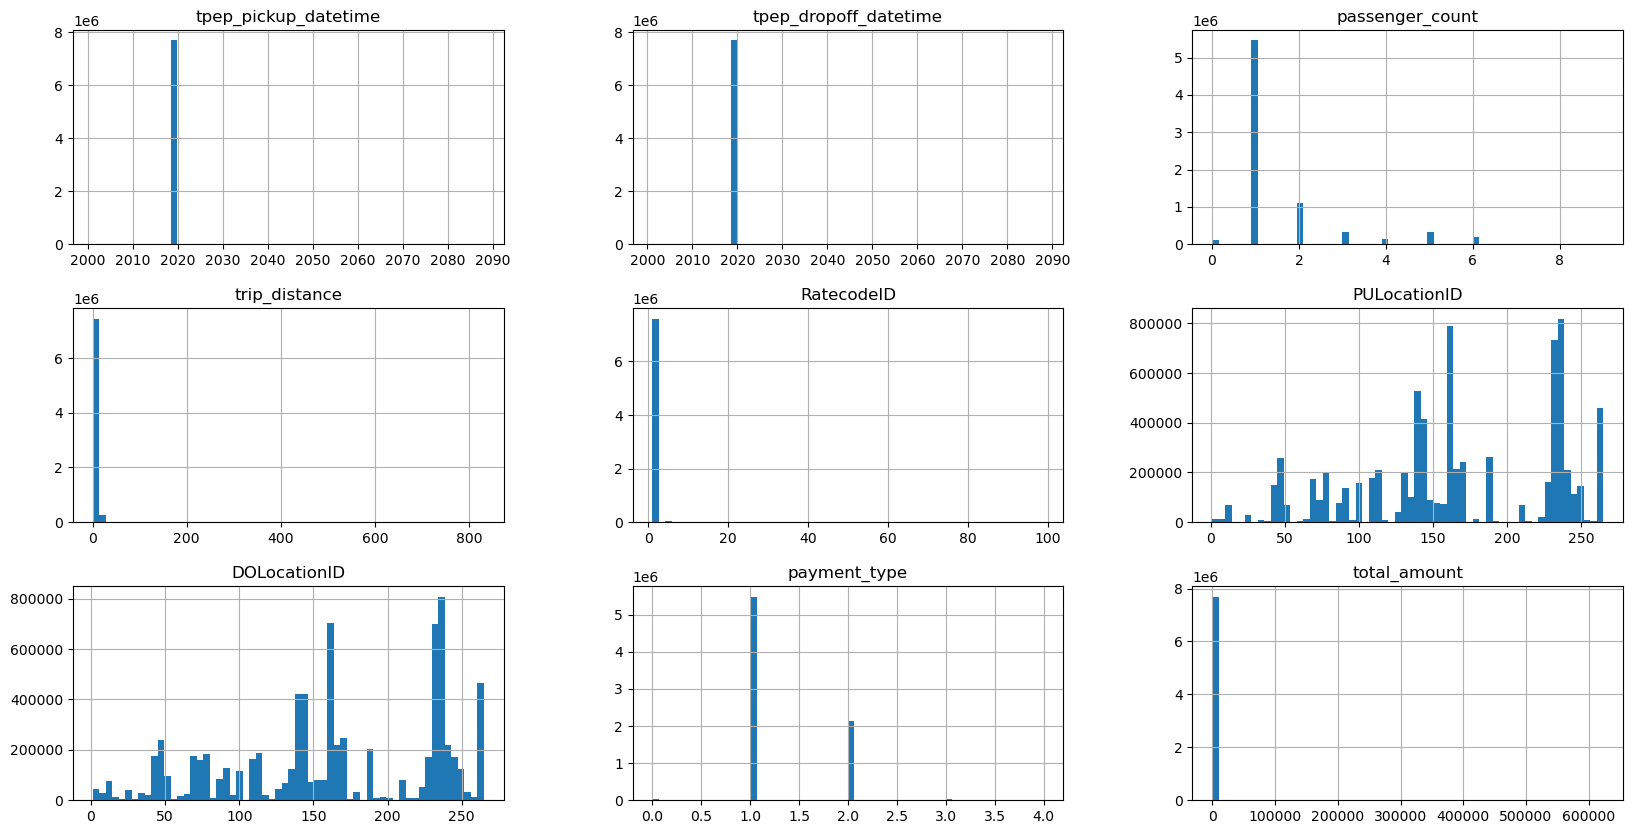

In [6]:
taxi_data.hist(figsize = (20, 10), bins = 60)

In [7]:
taxi_data['passenger_count'].max()

9.0

In [8]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

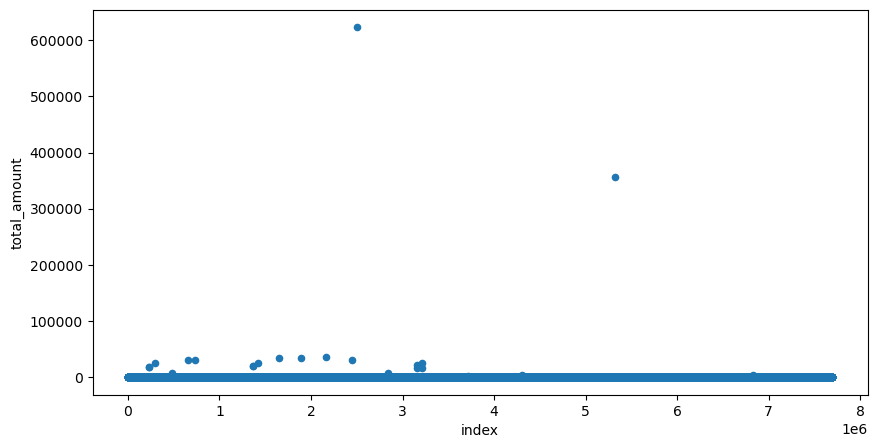

In [9]:
taxi_data.reset_index().plot(kind = 'scatter', x = 'index',  y = 'total_amount', figsize = (10, 5))

<Axes: xlabel='index', ylabel='total_amount'>

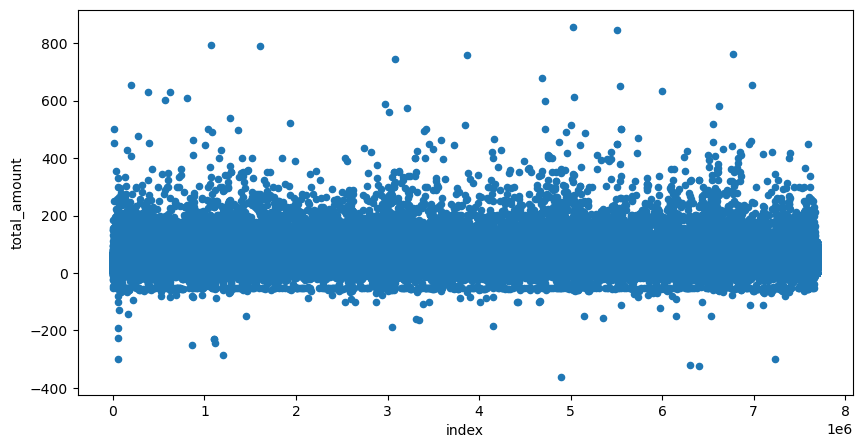

In [10]:
taxi_data[taxi_data['total_amount']< 1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

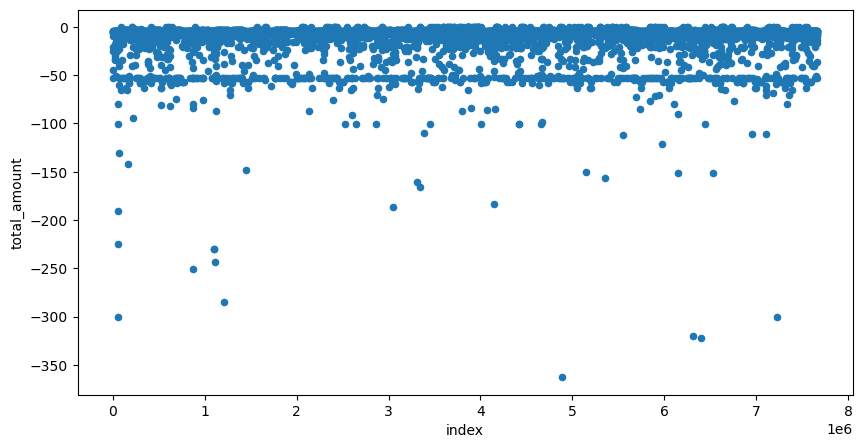

In [11]:
taxi_data[taxi_data['total_amount']< 0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [12]:
taxi_data[taxi_data.total_amount < 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [13]:
taxi_data[taxi_data.total_amount < 0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

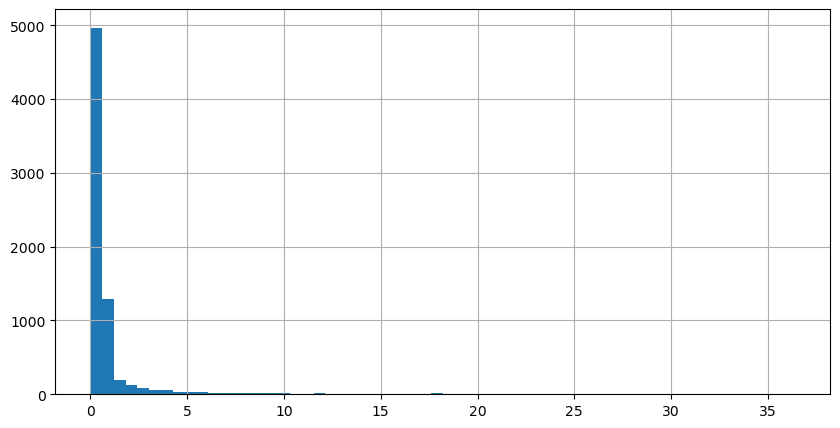

In [14]:
taxi_data[taxi_data.total_amount < 0]['trip_distance'].hist(bins = 60, figsize = (10, 5))

In [15]:
print(taxi_data[taxi_data.total_amount  == 0].shape)
taxi_data[taxi_data.total_amount  == 0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [16]:
taxi_data[taxi_data.total_amount  == 0]['payment_type'].value_counts()

payment_type
1    813
2    569
0    231
3     29
4      1
Name: count, dtype: int64

In [17]:
taxi_data[taxi_data.total_amount  == 0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

In [18]:
print(taxi_data[taxi_data.total_amount  > 500].shape)
taxi_data[taxi_data.total_amount  > 500].head()

(56, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
13272,2018-11-28 17:05:35,2018-11-29 10:05:34,5.0,0.0,1.0,193,193,2,500.55
194468,2019-01-02 02:23:48,2019-01-02 02:24:04,1.0,0.0,6.0,174,174,3,656.15
233858,2019-01-02 10:06:08,2019-01-02 10:06:08,0.0,0.0,99.0,264,264,1,18477.08
233859,2019-01-02 10:06:56,2019-01-02 10:06:56,0.0,0.0,99.0,264,264,1,17242.81
301112,2019-01-02 16:06:14,2019-01-02 16:06:14,0.0,0.0,99.0,264,264,1,25356.38


In [19]:
print(taxi_data[taxi_data.total_amount  > 300].shape)

(307, 9)


In [20]:
taxi_data['total_amount'].mean()

15.810651344610214

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [21]:
taxi_data_filtered = taxi_data [(taxi_data.total_amount >= 0) & (taxi_data.total_amount < 200)]
taxi_data_filtered.shape

(7688319, 9)

In [22]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [23]:
taxi_data_prepared = taxi_data_filtered.copy()
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


In [24]:
taxi_data_prepared.dtypes ## understand the types of columns

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [25]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tpep_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_dropoff_datetime'])

In [26]:
taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

/var/folders/d4/4x5dvxwn3lv77kbvpc3lzt8w0000gp/T/ipykernel_49081/2820828323.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '1.0' ... 'nan' 'nan' 'nan']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
/var/folders/d4/4x5dvxwn3lv77kbvpc3lzt8w0000gp/T/ipykernel_49081/2820828323.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['151' '239' '236' ... '159' '265' '237']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
/var/folders/d4/4x5dvxwn3lv77kbvpc3lzt8w0000gp/T/ipykernel_49081/2820828323.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

In [27]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [28]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
# -> we make it datetime again because it's very little use when it's just a string (can't compare, sort, etc.)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] =  taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [29]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

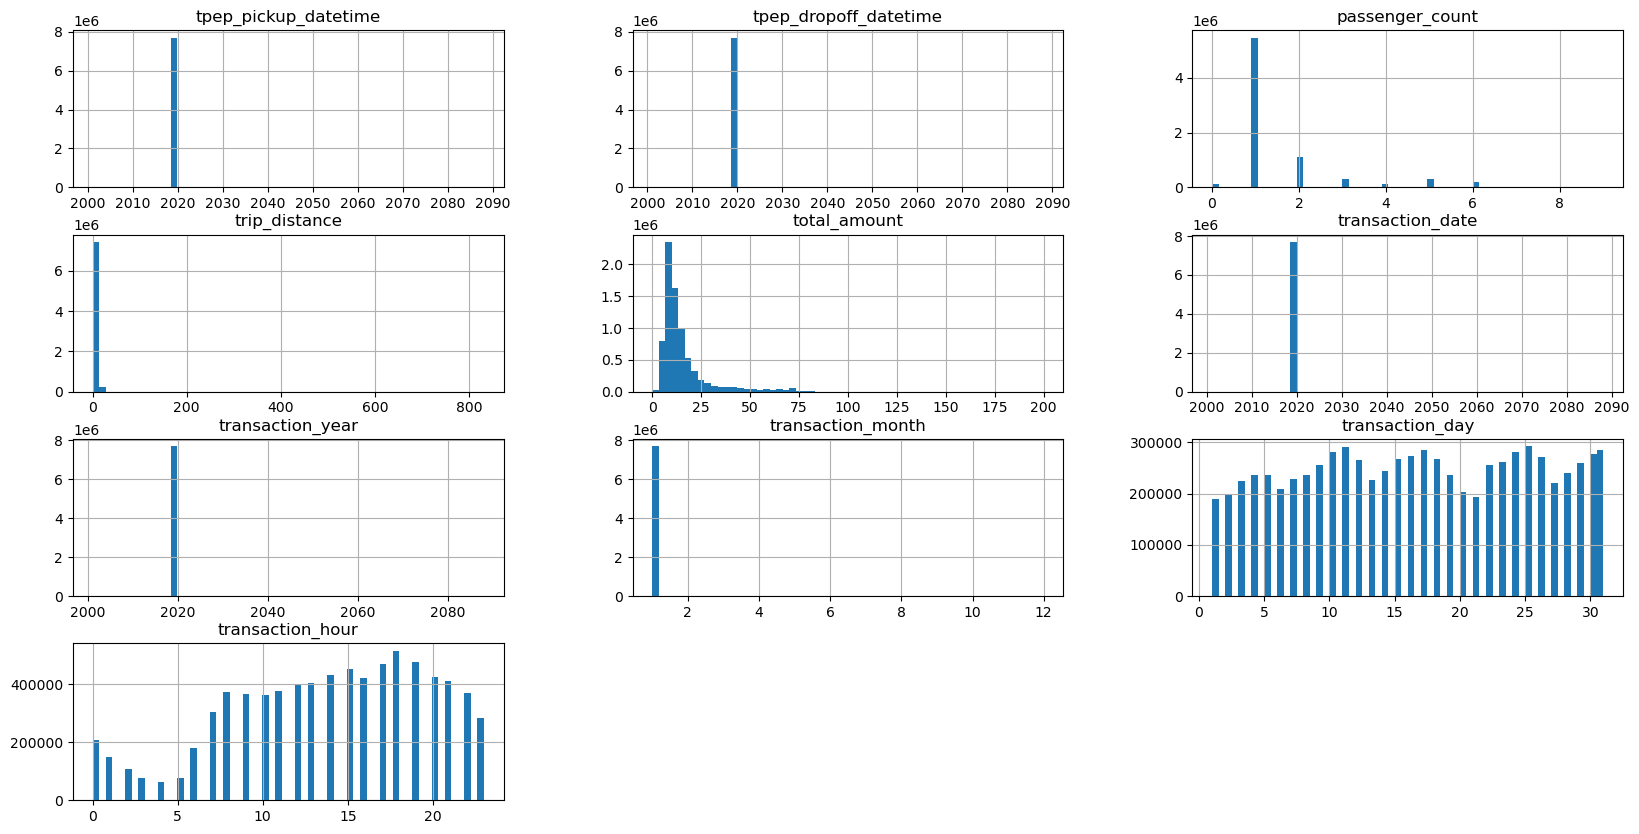

In [30]:
taxi_data_prepared.hist(figsize = (20,10), bins = 60)

In [31]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared.transaction_year == 2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared.transaction_month == 1]

In [32]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [33]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7687783, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [1]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

NameError: name 'main_taxi_df' is not defined

<Axes: >

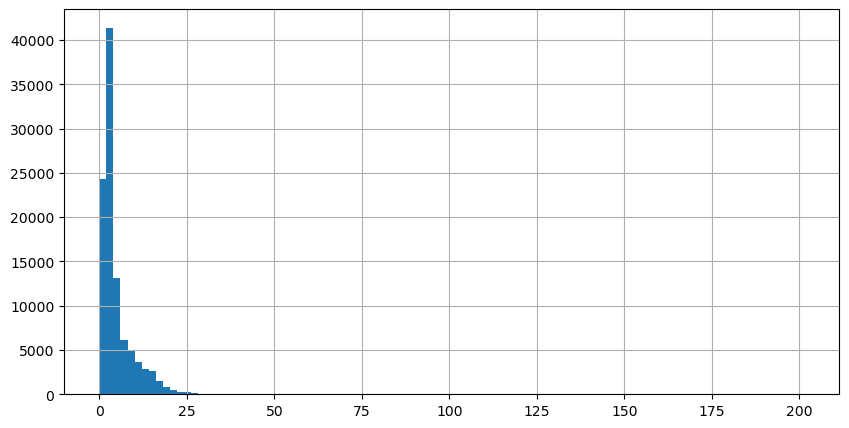

In [35]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))

<Axes: >

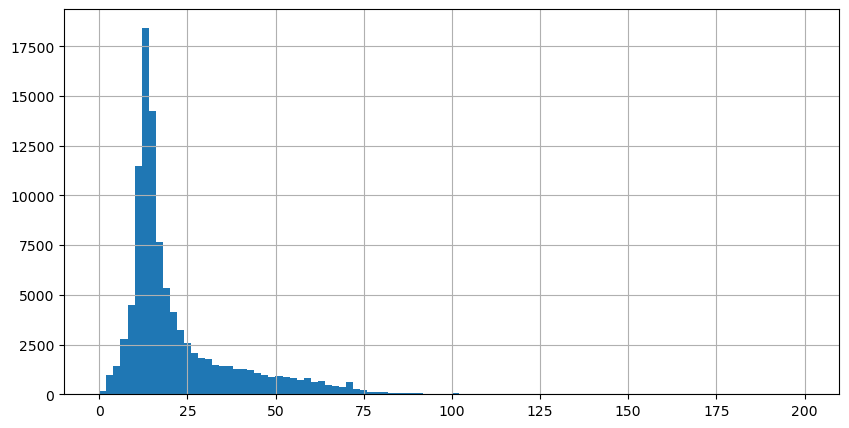

In [36]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

In [37]:
data_for_benchmark_model = taxi_grouped_by_region.copy()
data_for_benchmark_model

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.00,21.800,1
1,1,2019-01-01,1,1,5,0.00,87.300,1
2,1,2019-01-01,1,1,6,0.00,80.300,1
3,1,2019-01-01,1,1,8,0.00,128.580,2
4,1,2019-01-01,1,1,10,16.90,43.245,4
...,...,...,...,...,...,...,...,...
102708,98,2019-01-31,1,31,18,16.66,58.060,1
102709,99,2019-01-18,1,18,18,1.66,9.800,1
102710,99,2019-01-26,1,26,8,0.42,6.000,1
102711,99,2019-01-30,1,30,7,2.87,18.050,1


In [38]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark  = 'total_amount'

### 5.1. Trainning-test set split

In [39]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42) ## normally training test set split 80 vs 20

In [40]:
X_bench.head()

,transaction_month,transaction_day,transaction_hour,trip_distance,PULocationID_1,PULocationID_10,PULocationID_100,PULocationID_101,PULocationID_102,PULocationID_104,...,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_94,PULocationID_95,PULocationID_96,PULocationID_97,PULocationID_98,PULocationID_99
0,1,1,2,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,5,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,6,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,8,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,10,16.9,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 5.2. Fit a model to the data 

In [41]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10) # The depth can be adjusted later with more exploration later
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

### 5.3. Model evaluation

In [42]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 3.3808042293734677
mean_squared_error 60.854445014871025
root_mean_squared_error 7.800925907536299
r2 0.7931909357865208


<Axes: xlabel='true', ylabel='pred'>

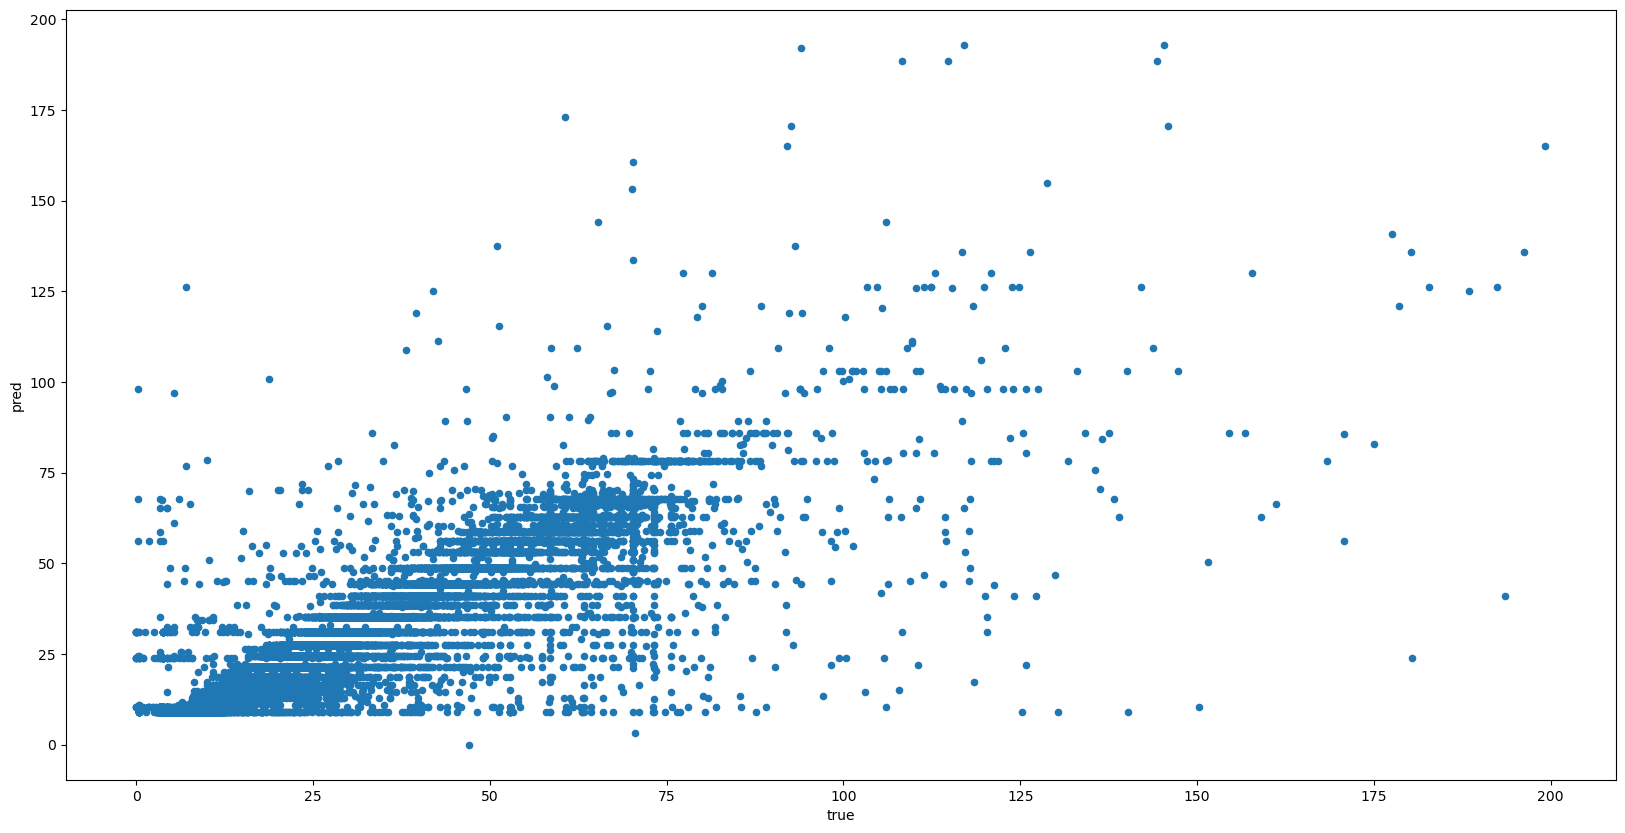

In [43]:
### plot it out to check how the predicted value does with observed value

data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

### 5.4. Fix problems

In [44]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 10.705963287393155
mean_squared_error 241.287224476438
root_mean_squared_error 15.53342281908395
r2 0.180004269393211


# 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [45]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [46]:
data_with_new_features = taxi_grouped_by_region.copy()

#### date related new-features

In [47]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [48]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)
data_with_new_features.head()

/var/folders/d4/4x5dvxwn3lv77kbvpc3lzt8w0000gp/T/ipykernel_49081/3669866558.py:6: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


#### Borough information

In [49]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [50]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [51]:
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        45315
Brooklyn         23721
Queens           22000
Bronx             9649
Unknown            744
Staten Island      304
EWR                271
Name: count, dtype: int64

#### Weather realted features, Integrate other useful information can obtain 

In [52]:
nyc_weather = pd.read_csv('data/NYC_Weather_2016_2022_formatted.csv')
nyc_weather['time'] = pd.to_datetime(nyc_weather['time'])
nyc_weather = nyc_weather[(nyc_weather.time >= '2018-12-31') & (nyc_weather.time <= '2019-02-01')]
nyc_weather.head()

,time,temperature,precipitation,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m
26280,2018-12-31 00:00:00,2.6,0.0,0.0,57.0,63.0,0.0,0.0,5.9
26281,2018-12-31 01:00:00,2.1,0.0,0.0,31.0,32.0,0.0,6.0,6.4
26282,2018-12-31 02:00:00,1.8,0.0,0.0,17.0,11.0,1.0,20.0,6.9
26283,2018-12-31 03:00:00,1.2,0.0,0.0,23.0,0.0,0.0,78.0,6.5
26284,2018-12-31 04:00:00,1.3,0.0,0.0,30.0,0.0,0.0,99.0,6.8


In [53]:
nyc_weather.shape

(769, 9)

In [54]:
nyc_weather.dtypes

time               datetime64[ns]
temperature               float64
precipitation             float64
rain                      float64
cloudcover                float64
cloudcover_low            float64
cloudcover_mid            float64
cloudcover_high           float64
windspeed_10m             float64
dtype: object

In [55]:
nyc_weather['cloudcover'].value_counts()

cloudcover
100.0    163
0.0      146
30.0      38
1.0       24
2.0       18
        ... 
55.0       1
63.0       1
24.0       1
56.0       1
76.0       1
Name: count, Length: 97, dtype: int64

In [56]:
nyc_weather['cloudcover'].unique()

array([ 57.,  31.,  17.,  23.,  30.,  29.,  40.,  45.,  58.,  61.,  96.,
        54., 100.,  99.,  97.,  69.,  91.,  86.,  73.,  43.,  18.,   8.,
        13.,  71.,  66.,  28.,  26.,  34.,  32.,  50.,  37.,  59.,  48.,
        81.,  72.,  56.,  44.,  84.,  52.,  42.,  20.,   4.,   5.,   2.,
         7.,   1.,   0.,  38.,  64.,  68.,   3.,   6.,  65.,  39.,  35.,
        22.,  21.,  19.,   9.,  47.,  90.,  88.,  87.,  92.,  85.,  89.,
        80.,  25.,  51.,  83.,  82.,  24.,  74.,  79.,  63.,  53.,  16.,
        11.,  27.,  67.,  55.,  15.,  41.,  46.,  75.,  95.,  70.,  10.,
        49.,  78.,  93.,  98.,  14.,  36.,  33.,  12.,  76.])

In [57]:
nyc_weather['precipitation'].value_counts()

precipitation
0.0    678
0.1     12
0.2     12
0.3      8
0.7      5
2.0      5
0.4      5
1.5      5
1.3      5
2.8      4
1.1      3
1.6      2
2.7      2
0.5      2
0.6      2
2.3      2
0.9      2
1.7      2
1.8      2
2.2      1
3.3      1
5.1      1
2.1      1
5.6      1
4.1      1
2.5      1
2.4      1
3.2      1
1.9      1
2.6      1
Name: count, dtype: int64

In [58]:
nyc_weather.isna().sum()

time               0
temperature        0
precipitation      0
rain               0
cloudcover         0
cloudcover_low     0
cloudcover_mid     0
cloudcover_high    0
windspeed_10m      0
dtype: int64

In [59]:
### No need to perform further manipulation on weather data missing value as there are no misising values
# option 1
# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# option 2
#nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True)
# option 3
# nyc_weather['amount of precipitation'].interpolate(inplace=True)

nyc_weather['hour'] = nyc_weather['time'].dt.hour
nyc_weather['month'] = nyc_weather['time'].dt.month
nyc_weather['day'] = nyc_weather['time'].dt.day
nyc_weather.head()

,time,temperature,precipitation,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,hour,month,day
26280,2018-12-31 00:00:00,2.6,0.0,0.0,57.0,63.0,0.0,0.0,5.9,0,12,31
26281,2018-12-31 01:00:00,2.1,0.0,0.0,31.0,32.0,0.0,6.0,6.4,1,12,31
26282,2018-12-31 02:00:00,1.8,0.0,0.0,17.0,11.0,1.0,20.0,6.9,2,12,31
26283,2018-12-31 03:00:00,1.2,0.0,0.0,23.0,0.0,0.0,78.0,6.5,3,12,31
26284,2018-12-31 04:00:00,1.3,0.0,0.0,30.0,0.0,0.0,99.0,6.8,4,12,31


In [60]:
nyc_weather.dtypes

time               datetime64[ns]
temperature               float64
precipitation             float64
rain                      float64
cloudcover                float64
cloudcover_low            float64
cloudcover_mid            float64
cloudcover_high           float64
windspeed_10m             float64
hour                        int32
month                       int32
day                         int32
dtype: object

In [61]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [62]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(102713, 24)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,precipitation,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,2.4,2.4,100.0,100.0,100.0,100.0,17.3,2,1,1
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,5.1,5.1,100.0,100.0,100.0,100.0,8.5,5,1,1
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,3.3,3.3,100.0,100.0,88.0,99.0,11.3,6,1,1
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,0.0,0.0,100.0,99.0,63.0,98.0,24.0,8,1,1
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,0.0,0.0,99.0,99.0,3.0,28.0,24.3,10,1,1


In [63]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['time','hour','month','day'], axis=1)
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,precipitation,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,6.8,2.4,2.4,100.0,100.0,100.0,100.0,17.3
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,8.1,5.1,5.1,100.0,100.0,100.0,100.0,8.5
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,8.5,3.3,3.3,100.0,100.0,88.0,99.0,11.3
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,9.8,0.0,0.0,100.0,99.0,63.0,98.0,24.0
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,13.1,0.0,0.0,99.0,99.0,3.0,28.0,24.3


In [64]:
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                  709
temperature                0
precipitation              0
rain                       0
cloudcover                 0
cloudcover_low             0
cloudcover_mid             0
cloudcover_high            0
windspeed_10m              0
dtype: int64

In [65]:
nyc_taxi_with_weather[nyc_taxi_with_weather.cloudcover.isna()].head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,precipitation,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m


In [66]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate() ## based on the mean of two adjacent one
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum() 

/var/folders/d4/4x5dvxwn3lv77kbvpc3lzt8w0000gp/T/ipykernel_49081/1373158854.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate() ## based on the mean of two adjacent one
/var/folders/d4/4x5dvxwn3lv77kbvpc3lzt8w0000gp/T/ipykernel_49081/1373158854.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')


PULocationID             0
transaction_date         0
transaction_month        0
transaction_day          0
transaction_hour         0
trip_distance            0
total_amount             0
count_of_transactions    0
transaction_week_day     0
weekend                  0
is_holiday               0
Borough                  0
temperature              0
precipitation            0
rain                     0
cloudcover               0
cloudcover_low           0
cloudcover_mid           0
cloudcover_high          0
windspeed_10m            0
dtype: int64

# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [67]:
data_for_model = nyc_taxi_with_weather.copy()

In [68]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'windspeed_10m', 'cloudcover',
       'precipitation']
target_feature = 'total_amount'

### train-test split

In [69]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 7.1. Decision tree <a id='decision_tree'></a>

In [70]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10)
# decision_tree = DecisionTreeRegressor() ## if does not specify the depth, i will go as far as it can and decision tree tends to overfit the model and lose the ability to generalize
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [71]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))  ## model performance improved from r^2 0.19 to r^2 = 0.29

mean_absolute_error 8.972858089072368
mean_squared_error 207.95272663920213
root_mean_squared_error 14.420566099817377
r2 0.3081281595610583


<Axes: xlabel='true', ylabel='pred'>

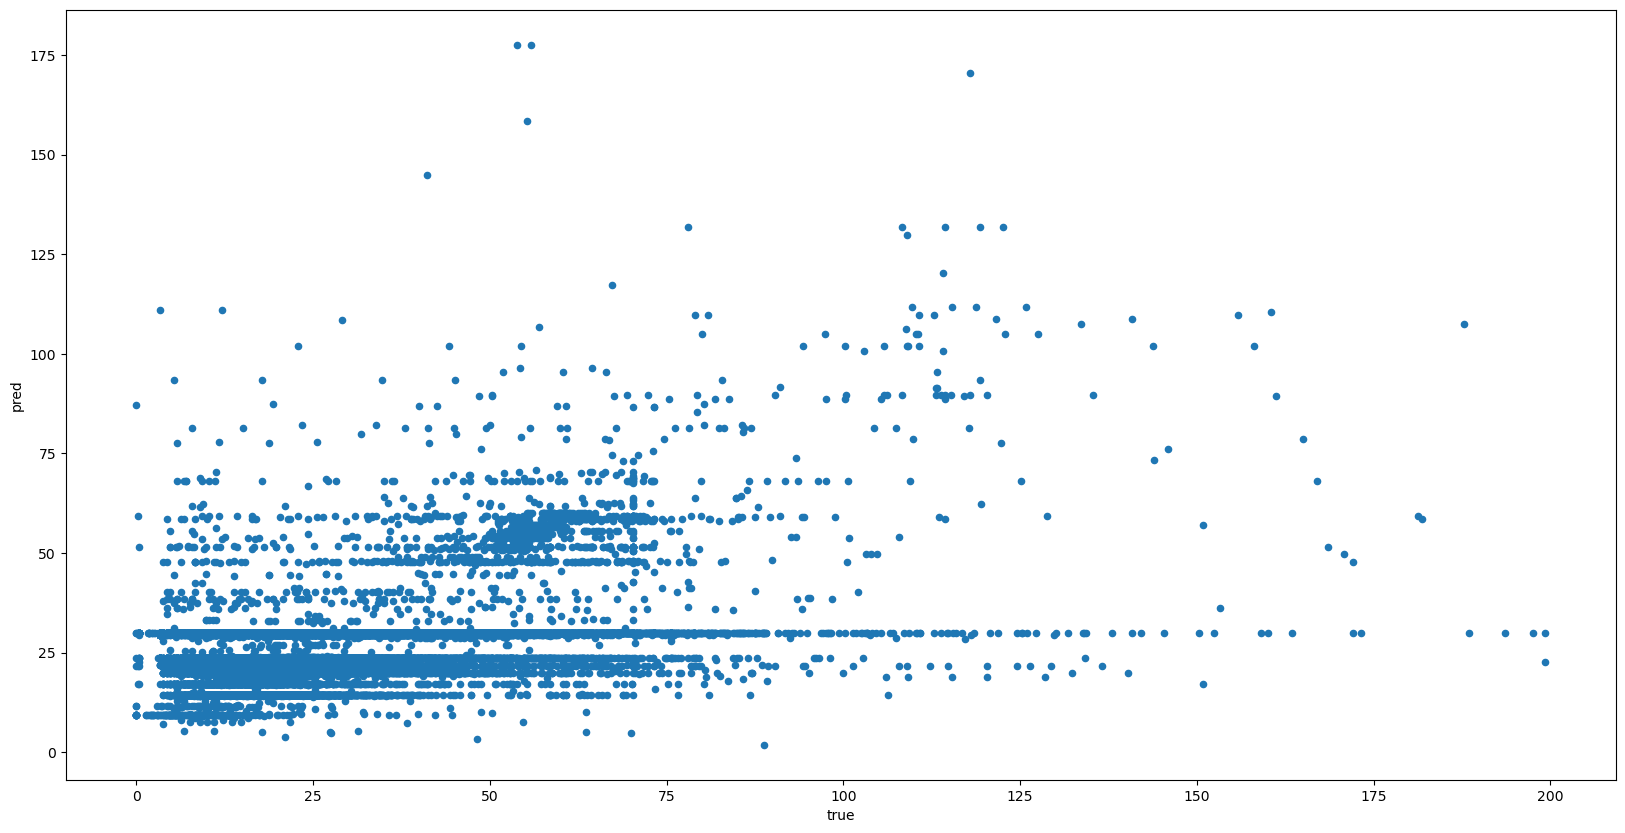

In [72]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

#### overfit

In [73]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [74]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [75]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.540702e+01,15.490908
1,5,1.464914e+01,14.859812
2,8,1.402482e+01,14.540099
3,10,1.362379e+01,14.411093
4,15,1.260688e+01,14.491804
5,20,1.168556e+01,14.783231
6,30,1.018613e+01,15.262792
7,50,6.648664e+00,16.530432
8,70,1.888416e+00,17.674314
9,100,6.497369e-17,17.783244


Text(0, 0.5, 'root mean squared error')

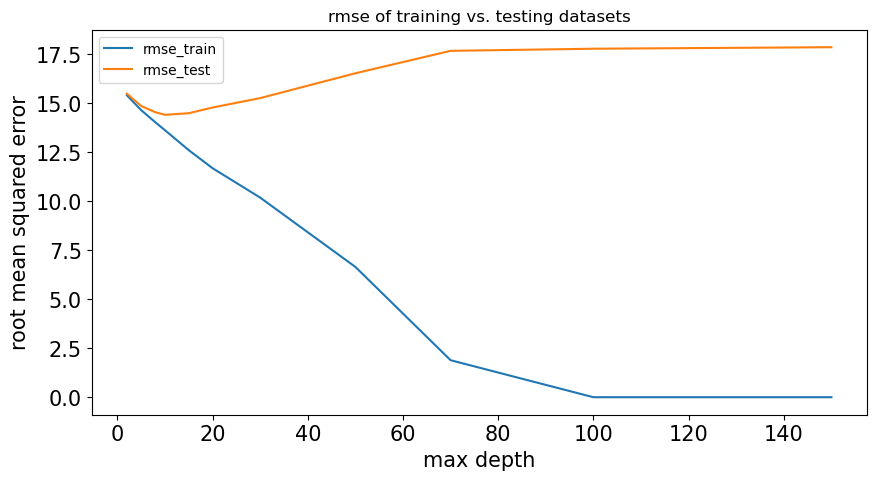

In [76]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

#### Underfit

In [77]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [78]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 10.435633757944164
mean_squared_error 252.1314717031789
root_mean_squared_error 15.878648295846183
r2 0.13910052456142452


In [79]:
# Testing performance

y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 10.511593220484173
mean_squared_error 258.9575381705064
root_mean_squared_error 16.092157660503652
r2 0.1384319339057396


## 7.2. Random forest <a id='random_forest'></a>

In [80]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [81]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.692550170258363
mean_squared_error 178.9768578131063
root_mean_squared_error 13.378223268173778
r2 0.40453270311778133


<Axes: xlabel='true', ylabel='pred'>

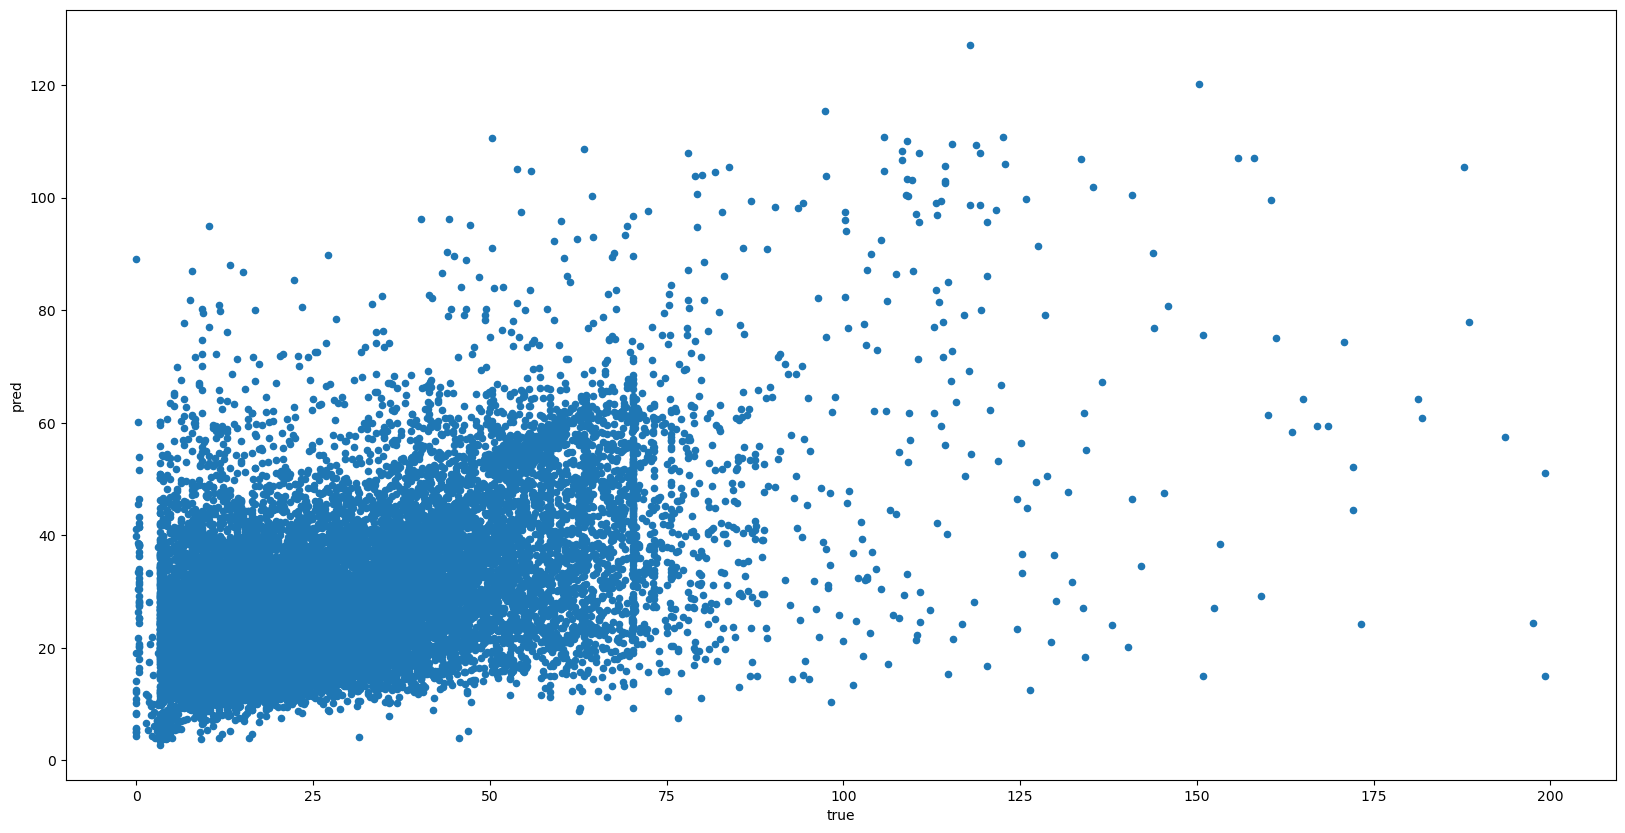

In [82]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## 7.3. Graideint Boosting <a id='Gradient Boosting'></a>

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [84]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.847563982994936
mean_squared_error 189.1705395991949
root_mean_squared_error 13.753928151593453
r2 0.3706176807366297


<Axes: xlabel='true', ylabel='pred'>

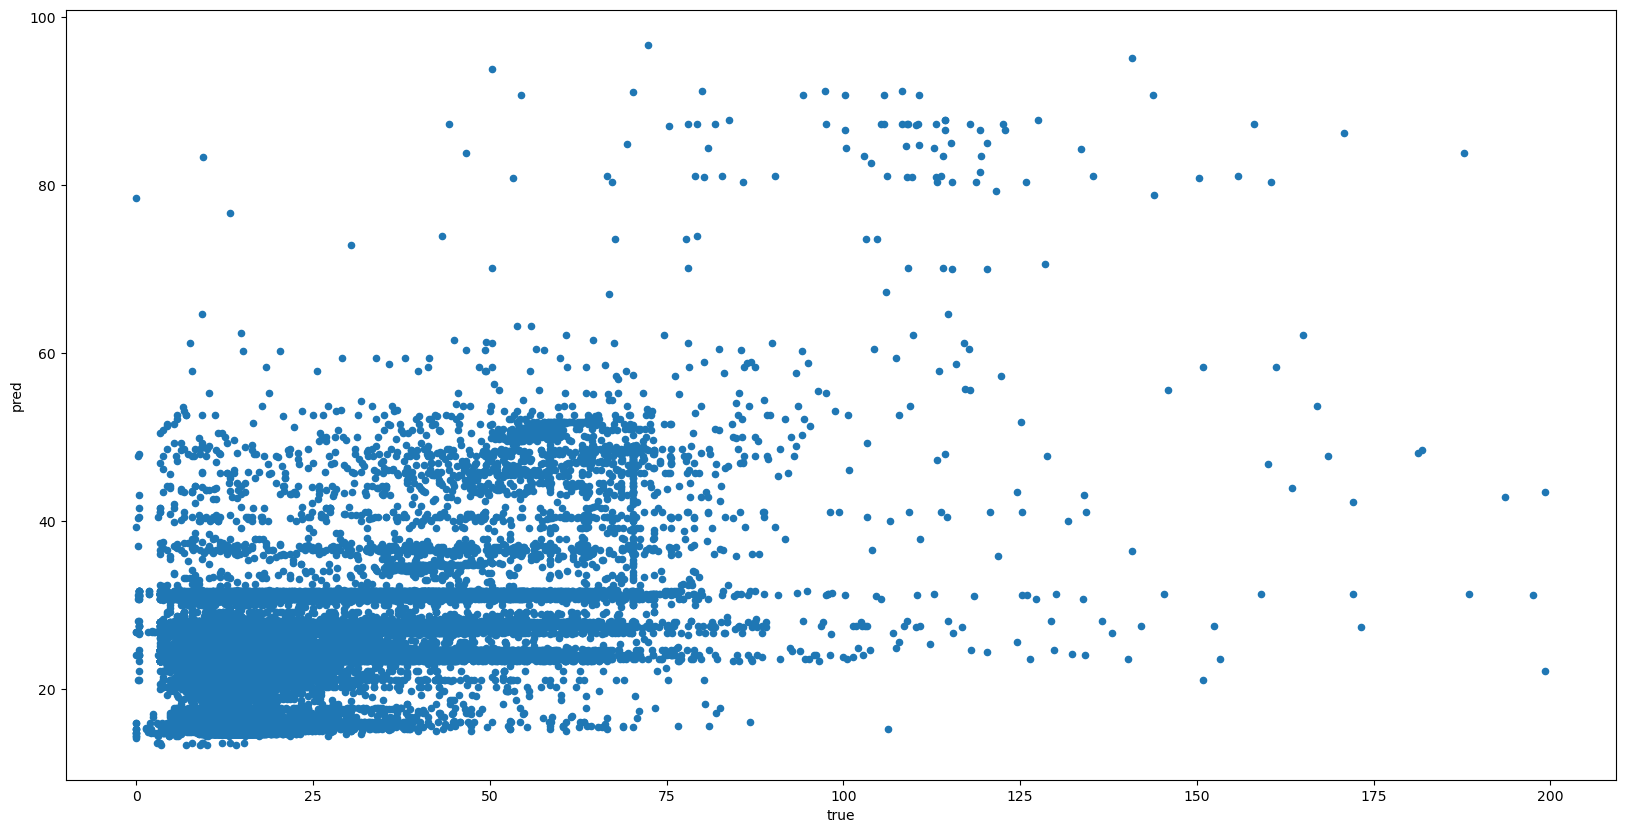

In [85]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: >

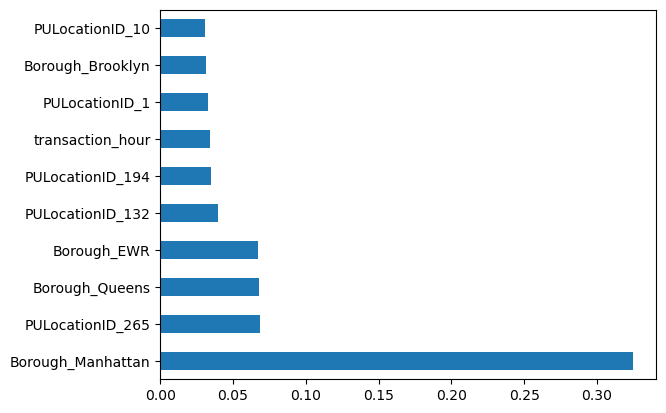

In [86]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns) ### shows which feature are more important for predicting
   .nlargest(10)
   .plot(kind='barh')) 

## 7.4. Comparing algorithm performances <a id='comparing_algorithm_performances'></a>

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)

### 8.1 Find best parameters

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [88]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [89]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   8.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=200; total time=  12.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=1400; total time=  32.1s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=500, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estima

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-packag

[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  31.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time= 1.7min
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=200; total time=  13.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=1400; total time=  31.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time= 1.7min
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  31.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=1400; total time=  31.1s
[CV] END bootstrap=False, 

In [90]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,29.731383,0.332366,1.843895,0.022478,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.429676,0.421445,0.416355,0.422492,0.005488,2
1,8.415700,0.153811,0.387547,0.023270,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.369732,0.356718,0.363099,0.363183,0.005313,6
2,11.997645,0.636046,0.396814,0.012095,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.372843,0.356942,0.360472,0.363419,0.006817,5
3,0.014550,0.000470,0.000000,0.000000,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",NaN,NaN,NaN,NaN,NaN,8
4,0.016020,0.002759,0.000000,0.000000,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",NaN,NaN,NaN,NaN,NaN,8
5,185.519224,0.268484,10.144391,0.374984,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.413645,0.404348,0.398815,0.405603,0.006119,4
6,30.502437,0.463359,1.100765,0.043087,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.276869,0.265916,0.270926,0.271237,0.004477,7
7,96.952507,0.215024,5.478273,0.644163,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.423320,0.412982,0.411589,0.415964,0.005233,3
8,0.017578,0.000501,0.000000,0.000000,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",NaN,NaN,NaN,NaN,NaN,8
9,75.265824,9.273707,3.911009,0.512473,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.437777,0.429680,0.426897,0.431451,0.004615,1


[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  31.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time= 1.7min
[CV] END bootstrap=False, max_depth=500, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time= 1.1min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   9.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time= 3.3min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   8.7s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=40, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_d

#### Use the parameter set gives the best mean test scrore

In [91]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=600,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 500,
bootstrap= False)

best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  79.97859907150269  seconds
mean_absolute_error 7.616635566300093
mean_squared_error 167.88477454692332
root_mean_squared_error 12.957035716047221
r2 0.4414367638997826


In [92]:
second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 10,
min_samples_leaf= 1,
max_features= 'sqrt',
max_depth= 200,
bootstrap= False)

second_best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  299.8312292098999  seconds
mean_absolute_error 7.6228883489460015
mean_squared_error 171.0050038832267
root_mean_squared_error 13.076888157479466
r2 0.4310555640550443


<Axes: xlabel='true', ylabel='pred'>

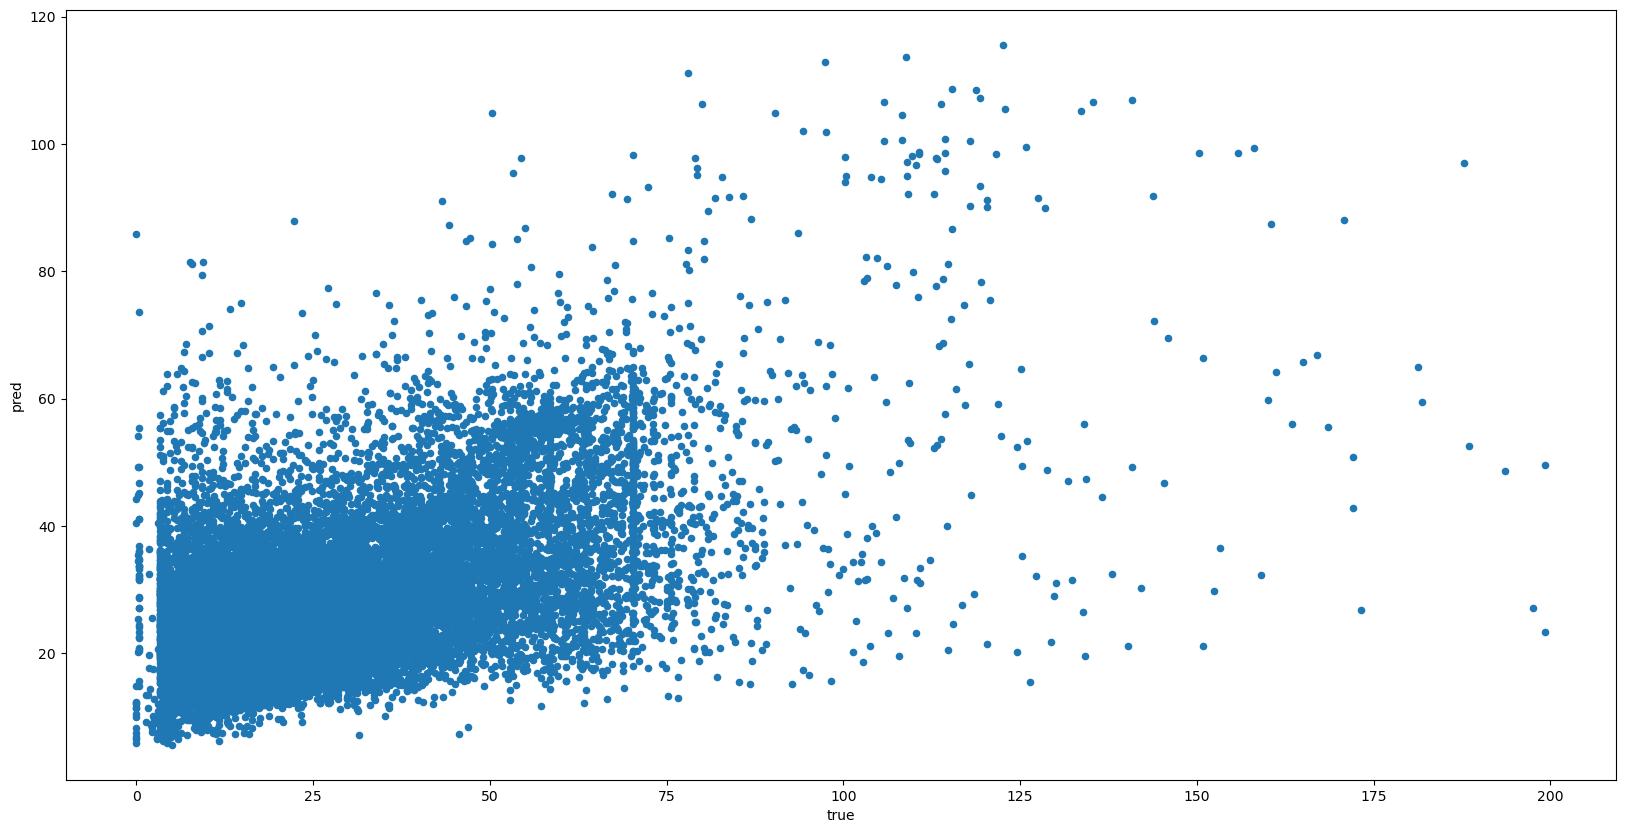

In [93]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## 9. Bonus:Classification <a id='Bonus:Classification'></a>
[Back to top](#table_of_contents)

<Axes: >

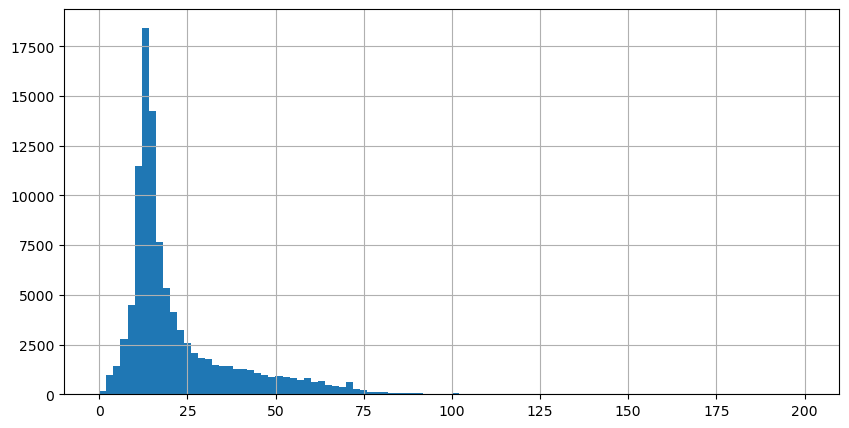

In [94]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

In [95]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_taxi_with_weather['total_amount'].apply(lambda x: 'low' if x<=15 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,temperature,precipitation,rain,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,earning_class,earning_class_binary
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,...,6.4,1.8,1.8,100.0,100.0,100.0,99.0,14.4,low,0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,...,6.4,1.8,1.8,100.0,100.0,100.0,99.0,14.4,high,1
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,...,6.4,1.8,1.8,100.0,100.0,100.0,99.0,14.4,high,1
3,107,2019-01-01,1,1,0,2.437458,14.897458,421,1,False,...,6.4,1.8,1.8,100.0,100.0,100.0,99.0,14.4,low,0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,...,6.4,1.8,1.8,100.0,100.0,100.0,99.0,14.4,low,0


In [97]:
nyc_class['earning_class'].value_counts() ## check to see if the data is balanced

earning_class
high    54616
low     48097
Name: count, dtype: int64

In [98]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'windspeed_10m', 'cloudcover',
       'precipitation']
target_feature = 'earning_class_binary'

In [99]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)

In [101]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[10964  4719]
 [ 3669 14544]]
accuracy 0.7525371725277319
precision 0.7550225821523128
recall 0.7985504859166529


<Axes: >

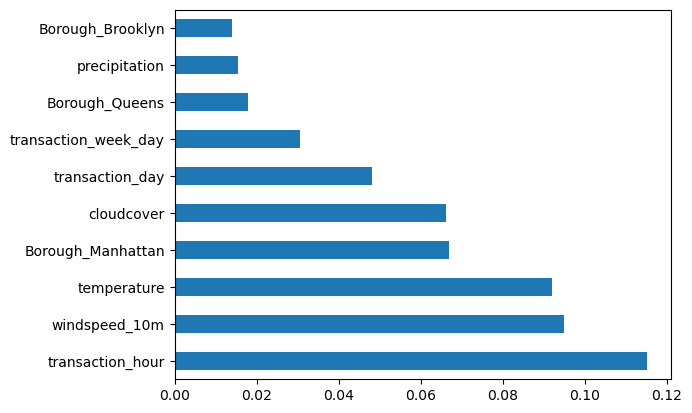

In [103]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 